# Pandas

In [1]:
import pandas as pd
import numpy as np


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from google.colab import files
file = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [12]:
import io
dataframe = pd.read_csv(io.BytesIO(file['imdb_top_1000.csv']))

In [13]:
column_names = dataframe.columns.tolist()
print("Column names:", column_names)

Column names: ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


In [14]:
average_rating = dataframe['IMDB_Rating'].mean()
print("Average rating:", average_rating)

Average rating: 7.949299999999999


In [15]:
unique_genres = dataframe['Genre'].nunique()
print("Number of unique genres:", unique_genres)

Number of unique genres: 202


In [18]:
results_df = pd.DataFrame({
    'Column Names': [column_names],
    'Average Rating': [average_rating],
    'Number Of Unique Genres': [unique_genres]
})
results_df.to_csv('answer.csv', index=False)


#Plotting

In [65]:
import matplotlib.pyplot as plt

In [66]:
dataframe['Genre'] = dataframe['Genre'].str.split(', ')

# Flatten the Genre column
flat_genre_list = [genre for genres in dataframe['Genre'] for genre in genres]
genre_series = pd.Series(flat_genre_list)


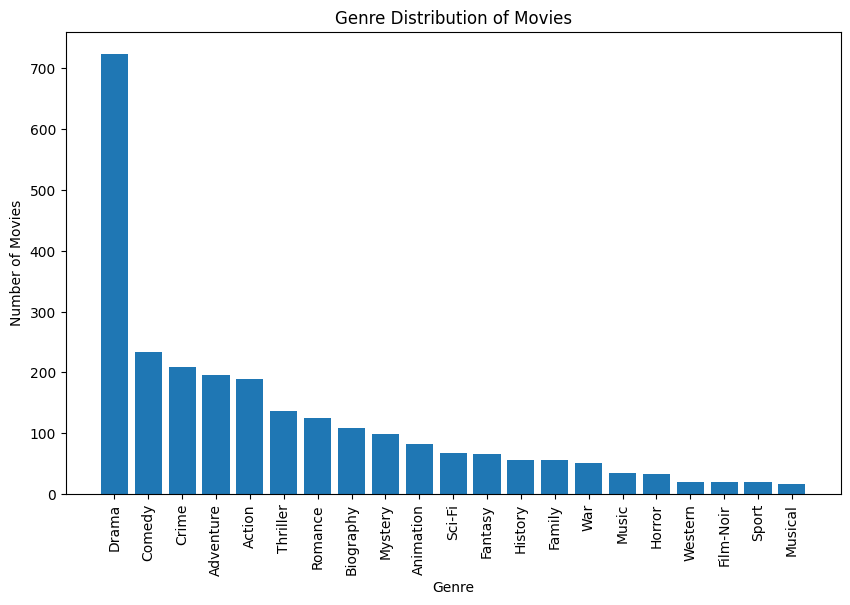

In [67]:
# Plot a histogram of genre distribution
genre_counts = genre_series.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Genre Distribution of Movies')
plt.xticks(rotation=90)
plt.show()

**Plot a scatterplot in this dataset for the number of movies vs year**

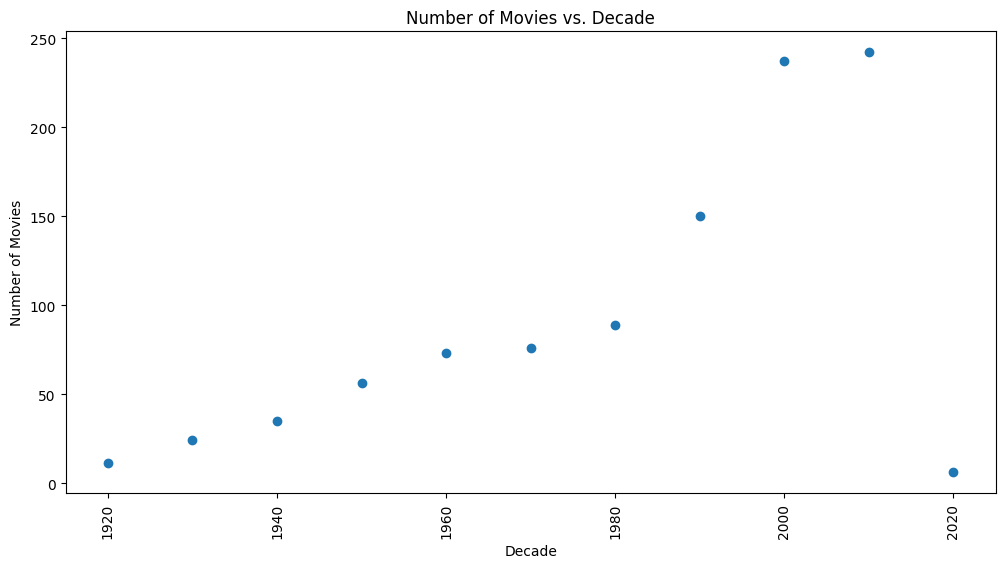

In [89]:
# Aggregate the data by decade
changed_to_int = [int(year)//10 * 10 for year in dataframe['Released_Year'] if year.isdigit()]

decade_counts = pd.Series(changed_to_int).value_counts().sort_index()

# Plot the scatterplot of number of movies vs. decade
plt.figure(figsize=(12, 6))
plt.scatter(decade_counts.index, decade_counts.values)
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.title('Number of Movies vs. Decade')
plt.xticks(rotation=90)
plt.show()

**Note:** Since the Visualization would clatter on the x-axis, I Aggrigated the data and plote the number of movies released for every Decade. 